# TSF GRIP Task 1 - Predicting using Supervised ML
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## **Author: Ahmed Mohie Younis**

### Import the essential libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the dataset
In the cell below we load the dataset using the link provided by @The Sparks Foundation, We can also load the data from the file 'student_scores.csv' attached with the project files

In [2]:
# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
# Printing the first 5 rows in the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Printing a quick information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Printing a quick statistical report about the dataset
# Printing mean, std, min, max, 25%, 50%, 75%
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Relation between the hours studied and percentage scores

In [6]:
# The correlation between hours studied and percentage scores
df['Hours'].corr(df['Scores'])

0.9761906560220887

The correlation between hours studied and percentage scores is positive, which means the more hours studying the more score will get

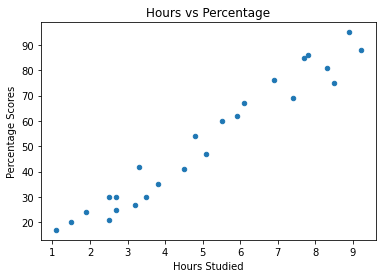

In [7]:
# Visualizating the Correlationg between Hours studied and percentage scores
df.plot(x = 'Hours', y = 'Scores', kind = 'scatter')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

### Data Preprocessing 

In [8]:
# Preparing the dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Train_Test_Split

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Train the Model using Linear Regression

In [10]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# Model Score 
train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)
print("Train Set Score: {}% ".format(train_score.round(4)*100))
print("Test Set Score: {}% ".format(test_score.round(4)*100))

Train Set Score: 95.16% 
Test Set Score: 94.55% 


### Test the Model

In [12]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

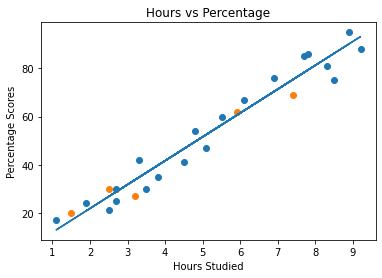

In [13]:
# Visualising the Training & Test sets results
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

In [14]:
# Comparing Actual vs Predicted
df_compared= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_compared

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# Test the model on single input
pred_score = regressor.predict(np.array([[9.25]]))
print("Predicted score if student studies [9.25] hrs/day = {}".format(pred_score[0].round(3)))

Predicted score if student studies [9.25] hrs/day = 93.692


###  Model Evaluation

In [16]:
# Model Evaluation
from sklearn import metrics  
abs_e = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {} '.format(abs_e.round(3))) 

Mean Absolute Error: 4.184 
